In [1]:
import numpy as np # linear algebra
import pandas as pd; pd.set_option('display.max_columns', None)

# visualization
import seaborn as sns; sns.set(style='white', palette='Set2')
import matplotlib.pyplot as plt

In [94]:
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

In [111]:
xls = pd.ExcelFile('2 year Sales data for testing 3.13.2018 convert.xlsx')
sheet16 = xls.parse(0)
sheet17 = xls.parse(1)

In [112]:
type(sheet16)

pandas.core.frame.DataFrame

In [113]:
sheet16.head()

,catalog_name,item_id,ITEM_NAME,W_PRICE,page_num,Initial Status,Initial_status,Brand,LINE,SUBLINE,CATEGORY,SEASON,FAMILY,Vendor,2015 June Book Amt,2015 July Book Amt,2015 Aug Book Amt,2015 Sept Book Amt,2015 Oct Book Amt,2015 Nov Book Amt,2015 Dec Book Amt,2016 Jan Book Amt,2016 Feb Book Amt,2016 Mar Book Amt,2016 Apr Book Amt,2016 May Book Amt,2015 June Book Qty,2015 July Book Qty,2015 Aug Book Qty,2015 Sept Book Qty,2015 Oct Book Qty,2015 Nov Book Qty,2015 Dec Book Qty,2016 Jan Book Qty,2016 Feb Book Qty,2016 Mar Book Qty,2016 Apr Book Qty,2016 May Book Qty,CARTON_PACK_UNITS,CARTON_PACK_VOLUME
0,2016 Evergreen Garden Spring Summer,47M160,"Radiant Butterflies Screen Door Savers, 6 Asst...",2.5,250,New,1,EvergreenGarden,Garden,outdoor decor,Screen Saver,everyday,Decal,NB-Yumton,32422.26,50604.06,45403.80,20934.42,19410.30,13096.20,6328.14,14757.6000,13955.76,15185.4378,13297.44,3633.240,13260,19812,17706,7878,7254,4836,2574,5538,4914,5616,4914,1326,78,1.05
1,2016 Evergreen Garden Spring Summer,01119,"Metal Bird Bath Stand, Hourglass Shape",17.5,48,Carryover,0,EvergreenGarden,Garden,Hardware,stand,everyday,Bird,NB-006,41376.94,32939.24,25489.80,20398.60,15851.46,10110.18,7618.18,17968.5000,11713.52,18811.2900,19082.10,23701.330,2505,2035,1536,1228,966,613,460,1070,720,1205,1189,1434,4,2.84
2,2016 Evergreen Garden Spring Summer,47M331,"Brushed Metallics Mini Kinetics, 4 Asst. Desig...",6.0,169,New,1,EvergreenGarden,Garden,Garden Stake,kinetic,everyday,CDU,NB-006,12053.16,17884.56,15062.52,7575.84,8626.32,5671.32,1933.20,3190.4100,4954.32,5514.8400,3896.16,853.866,2124,3144,2604,1308,1536,1008,324,552,852,936,672,144,12,2.76
3,2016 Evergreen Garden Spring Summer,2WC1025,"Solar Mobile, Painted Hummingbird",12.5,106,Carryover,0,EvergreenGarden,Garden,outdoor decor,Mobiles,everyday,Night Garden,NB-Jiafeng,14311.10,13523.87,11962.50,8287.64,7642.90,5225.52,1853.04,5176.1000,7394.59,7770.0600,10916.26,9990.562,1300,1156,1048,700,672,464,176,448,632,682,940,923,8,1.84
4,2016 Evergreen Garden Spring Summer,P355,"Glow in the dark garden stake, 24 assorted sta...",120.0,145,Carryover,0,EvergreenGarden,Garden,Garden Stake,stake,everyday,Night Garden,NB-GOODU,13294.96,16302.66,14265.07,5355.92,6409.01,5230.61,1849.64,6687.0775,5558.55,6311.3700,4906.86,5115.080,115,141,127,46,55,43,15,58,48,55,42,43,1,0.96


In [114]:
#df = sheet16
#df.dtypes.reset_index()

In [115]:
sheet16.isnull().sum()

catalog_name           0
item_id                0
ITEM_NAME              0
W_PRICE                0
page_num               0
Initial Status         0
Initial_status         0
Brand                  0
LINE                   0
SUBLINE                0
CATEGORY               0
SEASON                 0
FAMILY                35
Vendor                 0
2015 June Book Amt     0
2015 July Book Amt     0
2015 Aug Book Amt      0
2015 Sept Book Amt     0
2015 Oct Book Amt      0
2015 Nov Book Amt      0
2015 Dec Book Amt      0
2016 Jan Book Amt      0
2016 Feb Book Amt      0
2016 Mar Book Amt      0
2016 Apr Book Amt      0
2016 May Book Amt      0
2015 June Book Qty     0
2015 July Book Qty     0
2015 Aug Book Qty      0
2015 Sept Book Qty     0
2015 Oct Book Qty      0
2015 Nov Book Qty      0
2015 Dec Book Qty      0
2016 Jan Book Qty      0
2016 Feb Book Qty      0
2016 Mar Book Qty      0
2016 Apr Book Qty      0
2016 May Book Qty      0
CARTON_PACK_UNITS      0
CARTON_PACK_VOLUME     0


In [120]:
sheet16=sheet16.dropna().head()
sheet16.iloc[:,13]

0     NB-Yumton
1        NB-006
2        NB-006
3    NB-Jiafeng
4      NB-GOODU
Name: Vendor, dtype: object

In [123]:
sheet16['Amt_Total']=sheet16.iloc[:,14:26].sum(axis=1)
sheet16['Qty_Total']=sheet16.iloc[:,26:38].sum(axis=1)
sheet16.head()

,catalog_name,item_id,ITEM_NAME,W_PRICE,page_num,Initial Status,Initial_status,Brand,LINE,SUBLINE,CATEGORY,SEASON,FAMILY,Vendor,2015 June Book Amt,2015 July Book Amt,2015 Aug Book Amt,2015 Sept Book Amt,2015 Oct Book Amt,2015 Nov Book Amt,2015 Dec Book Amt,2016 Jan Book Amt,2016 Feb Book Amt,2016 Mar Book Amt,2016 Apr Book Amt,2016 May Book Amt,2015 June Book Qty,2015 July Book Qty,2015 Aug Book Qty,2015 Sept Book Qty,2015 Oct Book Qty,2015 Nov Book Qty,2015 Dec Book Qty,2016 Jan Book Qty,2016 Feb Book Qty,2016 Mar Book Qty,2016 Apr Book Qty,2016 May Book Qty,CARTON_PACK_UNITS,CARTON_PACK_VOLUME,Amt_Total,Qty_Total
0,2016 Evergreen Garden Spring Summer,47M160,"Radiant Butterflies Screen Door Savers, 6 Asst...",2.5,250,New,1,EvergreenGarden,Garden,outdoor decor,Screen Saver,everyday,Decal,NB-Yumton,32422.26,50604.06,45403.80,20934.42,19410.30,13096.20,6328.14,14757.6000,13955.76,15185.4378,13297.44,3633.240,13260,19812,17706,7878,7254,4836,2574,5538,4914,5616,4914,1326,78,1.05,249028.6578,95628
1,2016 Evergreen Garden Spring Summer,01119,"Metal Bird Bath Stand, Hourglass Shape",17.5,48,Carryover,0,EvergreenGarden,Garden,Hardware,stand,everyday,Bird,NB-006,41376.94,32939.24,25489.80,20398.60,15851.46,10110.18,7618.18,17968.5000,11713.52,18811.2900,19082.10,23701.330,2505,2035,1536,1228,966,613,460,1070,720,1205,1189,1434,4,2.84,245061.1400,14961
2,2016 Evergreen Garden Spring Summer,47M331,"Brushed Metallics Mini Kinetics, 4 Asst. Desig...",6.0,169,New,1,EvergreenGarden,Garden,Garden Stake,kinetic,everyday,CDU,NB-006,12053.16,17884.56,15062.52,7575.84,8626.32,5671.32,1933.20,3190.4100,4954.32,5514.8400,3896.16,853.866,2124,3144,2604,1308,1536,1008,324,552,852,936,672,144,12,2.76,87216.5160,15204
3,2016 Evergreen Garden Spring Summer,2WC1025,"Solar Mobile, Painted Hummingbird",12.5,106,Carryover,0,EvergreenGarden,Garden,outdoor decor,Mobiles,everyday,Night Garden,NB-Jiafeng,14311.10,13523.87,11962.50,8287.64,7642.90,5225.52,1853.04,5176.1000,7394.59,7770.0600,10916.26,9990.562,1300,1156,1048,700,672,464,176,448,632,682,940,923,8,1.84,104054.1420,9141
4,2016 Evergreen Garden Spring Summer,P355,"Glow in the dark garden stake, 24 assorted sta...",120.0,145,Carryover,0,EvergreenGarden,Garden,Garden Stake,stake,everyday,Night Garden,NB-GOODU,13294.96,16302.66,14265.07,5355.92,6409.01,5230.61,1849.64,6687.0775,5558.55,6311.3700,4906.86,5115.080,115,141,127,46,55,43,15,58,48,55,42,43,1,0.96,91286.8075,788


In [124]:
sheet_del_12=sheet16.drop(sheet16.columns[14:38], axis=1)
sheet_del_12.head()

,catalog_name,item_id,ITEM_NAME,W_PRICE,page_num,Initial Status,Initial_status,Brand,LINE,SUBLINE,CATEGORY,SEASON,FAMILY,Vendor,CARTON_PACK_UNITS,CARTON_PACK_VOLUME,Amt_Total,Qty_Total
0,2016 Evergreen Garden Spring Summer,47M160,"Radiant Butterflies Screen Door Savers, 6 Asst...",2.5,250,New,1,EvergreenGarden,Garden,outdoor decor,Screen Saver,everyday,Decal,NB-Yumton,78,1.05,249028.6578,95628
1,2016 Evergreen Garden Spring Summer,01119,"Metal Bird Bath Stand, Hourglass Shape",17.5,48,Carryover,0,EvergreenGarden,Garden,Hardware,stand,everyday,Bird,NB-006,4,2.84,245061.1400,14961
2,2016 Evergreen Garden Spring Summer,47M331,"Brushed Metallics Mini Kinetics, 4 Asst. Desig...",6.0,169,New,1,EvergreenGarden,Garden,Garden Stake,kinetic,everyday,CDU,NB-006,12,2.76,87216.5160,15204
3,2016 Evergreen Garden Spring Summer,2WC1025,"Solar Mobile, Painted Hummingbird",12.5,106,Carryover,0,EvergreenGarden,Garden,outdoor decor,Mobiles,everyday,Night Garden,NB-Jiafeng,8,1.84,104054.1420,9141
4,2016 Evergreen Garden Spring Summer,P355,"Glow in the dark garden stake, 24 assorted sta...",120.0,145,Carryover,0,EvergreenGarden,Garden,Garden Stake,stake,everyday,Night Garden,NB-GOODU,1,0.96,91286.8075,788


In [91]:
#sheet16['Qty Total']

In [92]:
sheet16.head()

,catalog_name,item_id,ITEM_NAME,W_PRICE,page_num,Initial Status,Initial_status,Brand,LINE,SUBLINE,CATEGORY,SEASON,FAMILY,2016 May Book Qty
0,2016 Evergreen Garden Spring Summer,47M160,"Radiant Butterflies Screen Door Savers, 6 Asst...",2.5,250,New,1,EvergreenGarden,Garden,outdoor decor,Screen Saver,everyday,Decal,1326
1,2016 Evergreen Garden Spring Summer,01119,"Metal Bird Bath Stand, Hourglass Shape",17.5,48,Carryover,0,EvergreenGarden,Garden,Hardware,stand,everyday,Bird,1434
2,2016 Evergreen Garden Spring Summer,47M331,"Brushed Metallics Mini Kinetics, 4 Asst. Desig...",6.0,169,New,1,EvergreenGarden,Garden,Garden Stake,kinetic,everyday,CDU,144
3,2016 Evergreen Garden Spring Summer,2WC1025,"Solar Mobile, Painted Hummingbird",12.5,106,Carryover,0,EvergreenGarden,Garden,outdoor decor,Mobiles,everyday,Night Garden,923
4,2016 Evergreen Garden Spring Summer,P355,"Glow in the dark garden stake, 24 assorted sta...",120.0,145,Carryover,0,EvergreenGarden,Garden,Garden Stake,stake,everyday,Night Garden,43


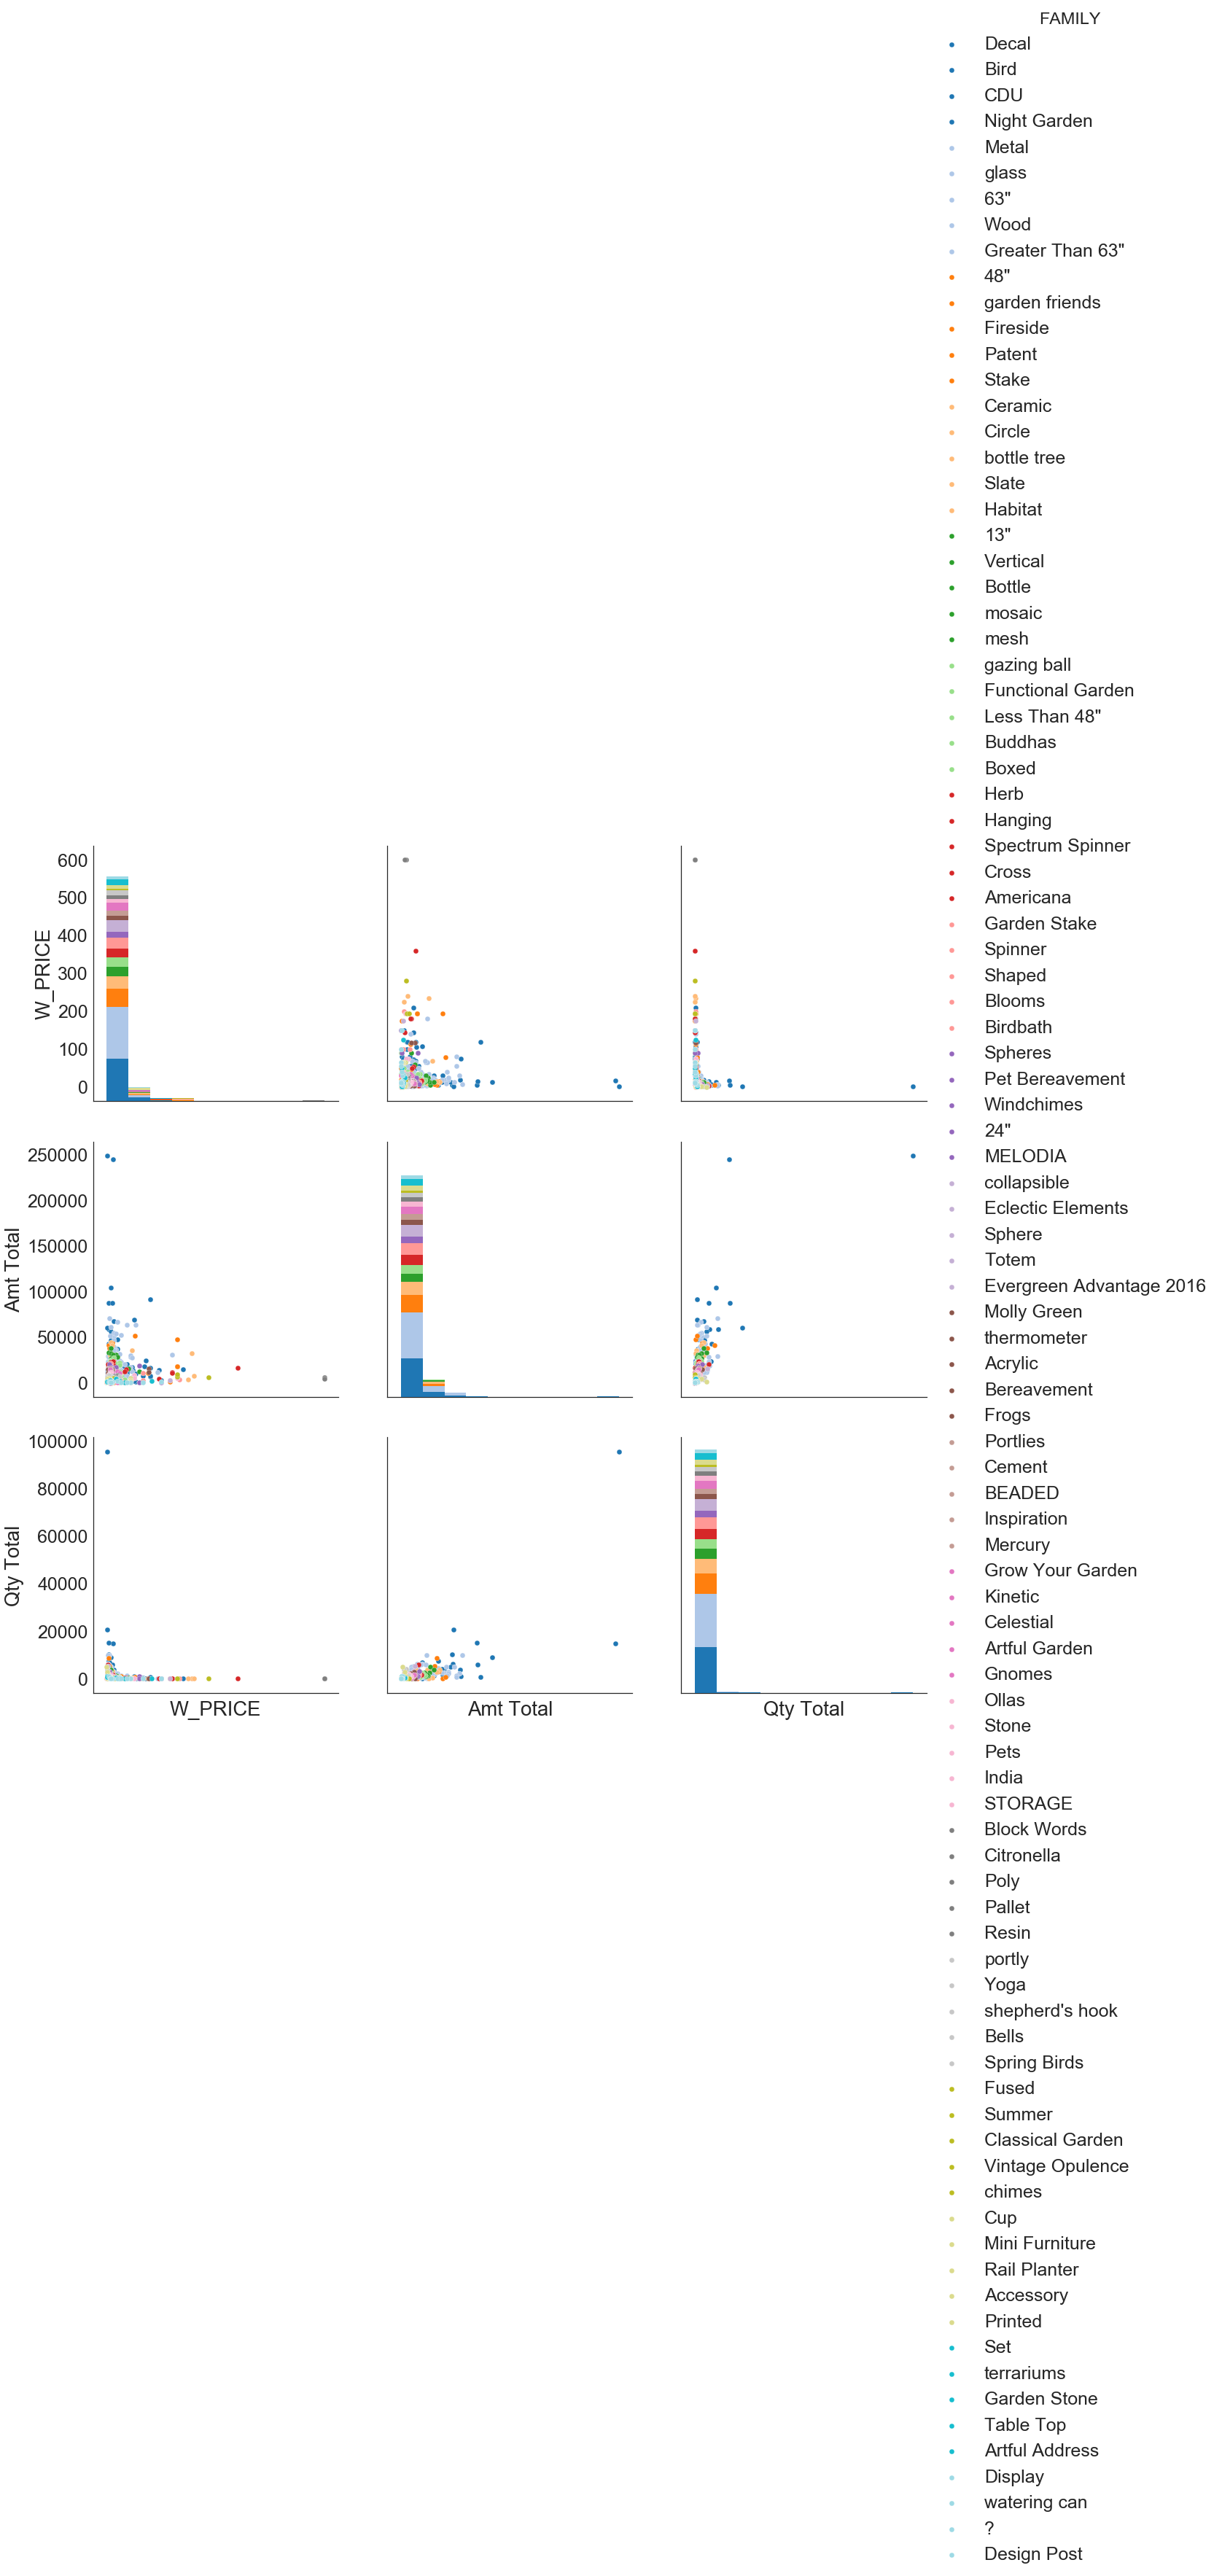

In [27]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(sheet16[['W_PRICE','Amt Total','Qty Total','CATEGORY','FAMILY']], 
                 hue='FAMILY', palette='tab20',size=6)
g.set(xticklabels=[]);

In [125]:
CATEGORY=sheet16['CATEGORY']
FAMILY=sheet16['FAMILY']
Vendor=sheet16['Vendor']
one_hot_CATEGORY= pd.get_dummies(CATEGORY)
one_hot_FAMILY= pd.get_dummies(FAMILY)
one_hot_Vendor= pd.get_dummies(Vendor)

In [140]:
one_hot_CATEGORY

,Mobiles,Screen Saver,kinetic,stake,stand
0,0,1,0,0,0
1,0,0,0,0,1
2,0,0,1,0,0
3,1,0,0,0,0
4,0,0,0,1,0


In [131]:
df = sheet_del_12.drop(['catalog_name','item_id','ITEM_NAME','Initial Status'],axis=1)
df_concat = pd.concat([df, one_hot_CATEGORY,one_hot_FAMILY,one_hot_Vendor], axis=1)
df_concat.head()

,W_PRICE,page_num,Initial_status,Brand,LINE,SUBLINE,CATEGORY,SEASON,FAMILY,Vendor,CARTON_PACK_UNITS,CARTON_PACK_VOLUME,Amt_Total,Qty_Total,Mobiles,Screen Saver,kinetic,stake,stand,Bird,CDU,Decal,Night Garden,NB-006,NB-GOODU,NB-Jiafeng,NB-Yumton
0,2.5,250,1,EvergreenGarden,Garden,outdoor decor,Screen Saver,everyday,Decal,NB-Yumton,78,1.05,249028.6578,95628,0,1,0,0,0,0,0,1,0,0,0,0,1
1,17.5,48,0,EvergreenGarden,Garden,Hardware,stand,everyday,Bird,NB-006,4,2.84,245061.1400,14961,0,0,0,0,1,1,0,0,0,1,0,0,0
2,6.0,169,1,EvergreenGarden,Garden,Garden Stake,kinetic,everyday,CDU,NB-006,12,2.76,87216.5160,15204,0,0,1,0,0,0,1,0,0,1,0,0,0
3,12.5,106,0,EvergreenGarden,Garden,outdoor decor,Mobiles,everyday,Night Garden,NB-Jiafeng,8,1.84,104054.1420,9141,1,0,0,0,0,0,0,0,1,0,0,1,0
4,120.0,145,0,EvergreenGarden,Garden,Garden Stake,stake,everyday,Night Garden,NB-GOODU,1,0.96,91286.8075,788,0,0,0,1,0,0,0,0,1,0,1,0,0


In [164]:
dff=df_concat.drop(['Vendor','CATEGORY','FAMILY','Brand','LINE','SUBLINE', 'page_num', 
                    'SEASON','CARTON_PACK_UNITS','CARTON_PACK_VOLUME'],axis=1)              

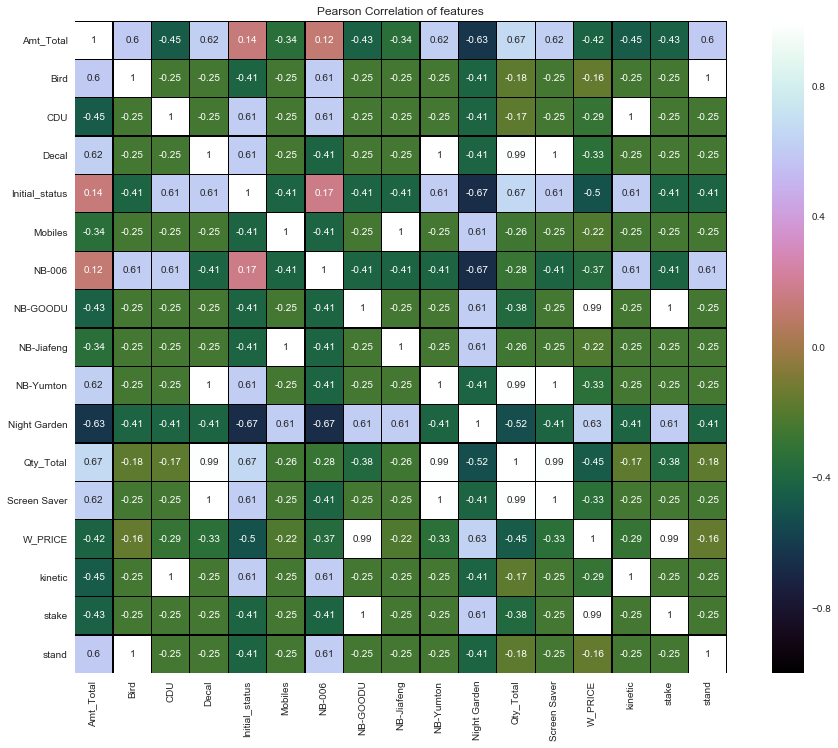

In [165]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in dff.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = dff.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = dff[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [166]:
dff.head()

,W_PRICE,Initial_status,Amt_Total,Qty_Total,Mobiles,Screen Saver,kinetic,stake,stand,Bird,CDU,Decal,Night Garden,NB-006,NB-GOODU,NB-Jiafeng,NB-Yumton
0,2.5,1,249028.6578,95628,0,1,0,0,0,0,0,1,0,0,0,0,1
1,17.5,0,245061.1400,14961,0,0,0,0,1,1,0,0,0,1,0,0,0
2,6.0,1,87216.5160,15204,0,0,1,0,0,0,1,0,0,1,0,0,0
3,12.5,0,104054.1420,9141,1,0,0,0,0,0,0,0,1,0,0,1,0
4,120.0,0,91286.8075,788,0,0,0,1,0,0,0,0,1,0,1,0,0


In [167]:
# First extract the target variable which is our Qty
Y = dff.Amt_Total.values
# Drop price from the house dataframe and create a matrix out of the house data
dff = dff.drop(['Qty_Total','Amt_Total'], axis=1)
X = dff.as_matrix()
# Store the column/feature names into a list "colnames"
colnames = dff.columns

In [168]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [169]:
# Finally let's run our Selection Stability method with Randomized Lasso
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), colnames)
print('finished')

finished


In [170]:
# Construct our Linear Regression model
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [171]:
#Linear Model Feature Ranking
# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

In [172]:
#Random Forest feature ranking
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

building tree 1 of 50 
building tree 3 of 50building tree 2 of 50building tree 4 of 50


 building tree 5 of 50
building tree 6 of 50
building tree 8 of 50building tree 7 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
 
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
 building tree 15 of 50building tree 17 of 50building tree 16 of 50


building tree 18 of 50
 building tree 19 of 50
building tree 20 of 50
building tree 22 of 50building tree 21 of 50

building tree 23 of 50
building tree 24 of 50
 building tree 26 of 50building tree 25 of 50
 
building tree 27 of 50building tree 28 of 50

building tree 29 of 50building tree 30 of 50

building tree 31 of 50building tree 33 of 50building tree 32 of 50


building tree 35 of 50 
building tree 34 of 50
building tree 36 of 50
building tree 37 of 50building tree 38 of 50
 
building tree 39 of 50 building tree 40 of 50
building tree 41 of 50
building tree 43 of 50

building tree 42 of 50
building t

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [173]:
#Creating the Feature Ranking Matrix

In [174]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Lasso	LinReg	RF	RFE	Ridge	rlasso/Stability	Mean
W_PRICE	0.01	0.0	0.76	0.0	0.04	0.29	0.18
Initial_status	0.11	0.07	0.0	0.07	0.18	0.02	0.07
Mobiles	0.85	0.43	0.24	0.36	0.69	0.32	0.48
Screen Saver	0.77	0.7	0.36	1.0	0.79	0.86	0.75
kinetic	1.0	0.91	0.37	0.5	1.0	1.0	0.8
stake	0.35	0.48	0.12	0.43	0.0	0.51	0.32
stand	0.57	1.0	0.24	0.93	0.93	0.76	0.74
Bird	0.0	1.0	0.56	0.79	0.93	0.34	0.6
CDU	0.05	0.91	0.47	0.64	1.0	0.47	0.59
Decal	0.18	0.76	0.24	0.71	0.79	0.33	0.5
Night Garden	0.05	0.55	1.0	0.57	0.72	0.16	0.51
NB-006	0.02	0.08	0.12	0.14	0.04	0.0	0.07
NB-GOODU	0.06	0.48	0.29	0.29	0.0	0.21	0.22
NB-Jiafeng	0.07	0.4	0.87	0.21	0.69	0.09	0.39
NB-Yumton	0.02	0.76	0.35	0.86	0.79	0.19	0.5


In [175]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

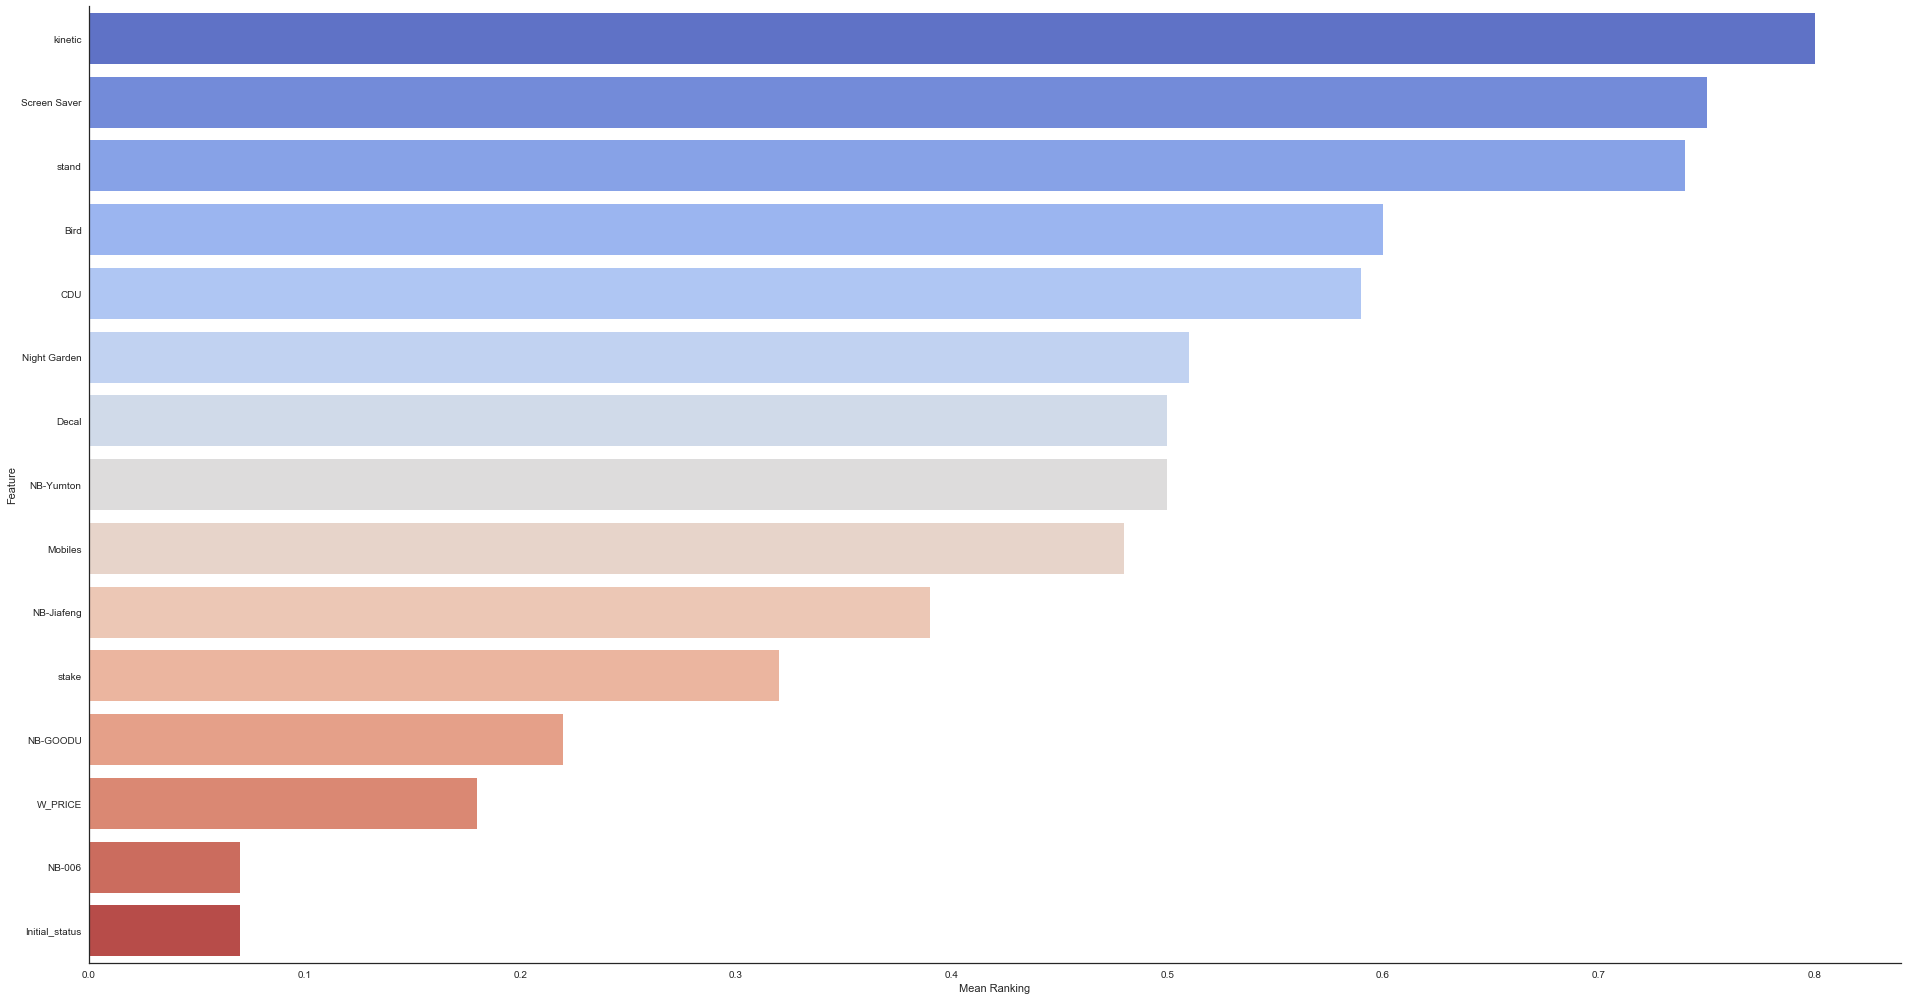

In [176]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')